<a href="https://colab.research.google.com/github/kgeetha248/CaseStudyML_NLP-Ensemble-XGBoost/blob/main/NLPEnsembleXGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Natural Language Processing - NLP** - Algorithm that deals with text / language related data. 
 A combo of Traditional(Rule based) & ML Algo
 

**Sentiment Analysis of IMDB reviews**

In [ ]:
import pandas as pd
data = pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.shape

(9867, 2)

In [ ]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
data.dtypes

review       object
sentiment    object
dtype: object

In [ ]:
#Frequency count
fc_df = pd.DataFrame(data['sentiment'].value_counts()).reset_index()
fc_df.columns = ['Sentiment', 'Count'] 
fc_df['Sentiment'] = fc_df['Sentiment'].map({'positive' : 1, 'negative' : 0}) 
fc_df

,Sentiment,Count
0,1,4955
1,0,4912


**Clean and compress**
1) Sentence tokenization
2) Word tokenization
3) Punctuation Removal
4) Stop words removal
5) Root word Extraction - Lemmatization


Removing Punctuations

In [ ]:
data['review']

0       One of the other reviewers has mentioned that ...
1       A wonderful little production. <br /><br />The...
2       I thought this was a wonderful way to spend ti...
3       Basically there's a family where a little boy ...
4       Petter Mattei's "Love in the Time of Money" is...
                              ...                        
9862    I enjoyed this movie. Haven't seen Andy Griffi...
9863    This educational show focused on emotions, int...
9864    I am decidedly not in the target audience for ...
9865    There are many things to admire about this fil...
9866    I have lately got into the habit of purchasing...
Name: review, Length: 9867, dtype: object

In [ ]:
#Replace punctuation with space
data['review_processed'] = data['review'].str.replace("[^a-zA-Z0-9]", ' ')
data = data[["review", "review_processed", 'sentiment']]
data.head()

<ipython-input-43-724e05fbac35>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['review_processed'] = data['review'].str.replace("[^a-zA-Z0-9]", ' ')


,review,review_processed,sentiment
0,One of the other reviewers has mentioned that ...,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,A wonderful little production br br The...,positive
2,I thought this was a wonderful way to spend ti...,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,Basically there s a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",Petter Mattei s Love in the Time of Money is...,positive


In [ ]:
#Removing the words having lesser than or three letters
data["review_processed"] = data["review_processed"].apply(lambda row : ' '.join(word for word in row.split() if len(word) > 2))

In [ ]:
#convert all words to lowercase
data["review_processed"] = [row.lower() for row in data["review_processed"]]
data["review_processed"]

0       one the other reviewers has mentioned that aft...
1       wonderful little production the filming techni...
2       thought this was wonderful way spend time too ...
3       basically there family where little boy jake t...
4       petter mattei love the time money visually stu...
                              ...                        
9862    enjoyed this movie haven seen andy griffith ag...
9863    this educational show focused emotions interac...
9864    decidedly not the target audience for this fil...
9865    there are many things admire about this film b...
9866    have lately got into the habit purchasing any ...
Name: review_processed, Length: 9867, dtype: object

**Stop words removal**

In [ ]:
#stop words corpus
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')
stop_words


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#Creating list of words from dataset to be added to stop word corpus for removal
add_words = ['movie','film','one','make','even','see','the','and','movies','get','makes','making','time','watch','character', 'like', 'good','well','would','really','basically','probably','the','other','has']

In [ ]:
#Adding to the stopwords corpus
stop_words = stop_words.extend(add_words)

In [ ]:
#Function to remove stop-words
def remove_stopwords(review):
  #input : Each row in dataset 
  #take para, break into words, check if word is a stop word, remove if yes, combine back to para
  review_tokenize = word_tokenize(review)
  review_new = " ".join([i for i in review_tokenize if i not in stop_words])
  return review_new

  data["review_processed"] = [remove_stopwords(r) for r in data["review_processed"]]


In [ ]:
  data["review_processed"]

0       one the other reviewers have mention that afte...
1       wonderful little production the film technique...
2       think this be wonderful way spend time too hot...
3       basically there family where little boy jake t...
4       petter mattei love the time money visually stu...
                              ...                        
9862    enjoy this movie haven see andy griffith age a...
9863    this educational show focus emotions interacti...
9864    decidedly not the target audience for this fil...
9865    there be many things admire about this film bu...
9866    have lately get into the habit purchase any in...
Name: review_processed, Length: 9867, dtype: object

**Lemmatization**

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

#function to convert nltk tag into wordnet tag:
Lemmatizer = WordNetLemmatizer()

#Finds parts of speech tags and converts theh detailed POS tags into shallow info
def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith("J"):
    return wordnet.ADJ
  if nltk_tag.startswith("V"):
    return wordnet.VERB
  if nltk_tag.startswith("N"):
    return wordnet.VERB
  if nltk_tag.startswith("R"):
    return wordnet.ADV
  else:
    return None

#Lemmatize sentance using pos tags:
def Lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
  # tokenize the sentence and find the POS tag for each token
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence)) # output will be a list of tuples -> [(word,detailed_tag)]
  #tuple of (token, wordnet_tag)
  wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])),nltk_tagged) # output -> [(word,shallow_tag)]
  lemmatized_sentence = []
  for word, tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
      lemmatized_sentence.append(Lemmatizer.lemmatize(word,tag))
  return(' '.join(lemmatized_sentence))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
data["review_processed"] = data["review_processed"].apply(lambda x : Lemmatize_sentence(x))
data["review_processed"]

0       one the other reviewers have mention that afte...
1       wonderful little production the film technique...
2       think this be wonderful way spend time too hot...
3       basically there family where little boy jake t...
4       petter mattei love the time money visually stu...
                              ...                        
9862    enjoy this movie haven see andy griffith age a...
9863    this educational show focus emotions interacti...
9864    decidedly not the target audience for this fil...
9865    there be many things admire about this film bu...
9866    have lately get into the habit purchase any in...
Name: review_processed, Length: 9867, dtype: object

In [ ]:
#an simple example to demonstrate above. Since it takes long time to run:
nltk_tagged = nltk.pos_tag(nltk.word_tokenize("This batch is awesome"))  
nltk_tagged

[('This', 'DT'), ('batch', 'NN'), ('is', 'VBZ'), ('awesome', 'JJ')]

**Plotting most frequent words **

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist # Function to find the frequent words in data

#Taking only positive reviews
positive_words_df = data.loc[data['sentiment'] == 'positive',:]

#Extract words into list and frequency count
positive_words = ' '.join([text for text in positive_words_df['review_processed']])
positive_words = positive_words.split()
words_df = FreqDist(positive_words)

#Extract words,frequency fro words_df object
words_df = pd.DataFrame({'word': list(words_df.keys()), 'count' :list(words_df.values())})
words_df



,word,count
0,one,5335
1,the,66867
2,other,1930
3,reviewers,49
4,have,10698
...,...,...
33081,comin,1
33082,atcha,1
33083,gaffes,1
33084,encounterd,1


In [ ]:
words_df = words_df.nlargest(columns = "count", n= 30)
words_df.sort_values('count',inplace = True)

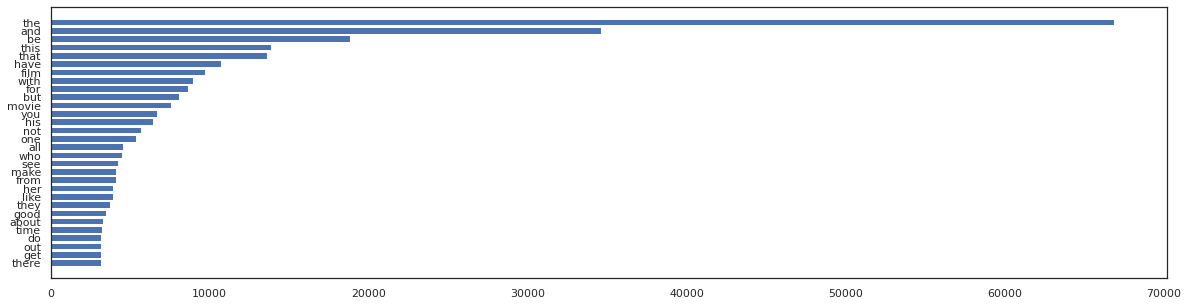

In [ ]:
#plotting 30 most frequent words
plt.figure(figsize = (20,5))
ax = plt.barh(words_df['word'],width = words_df['count'])
plt.show()

**Word cloud**

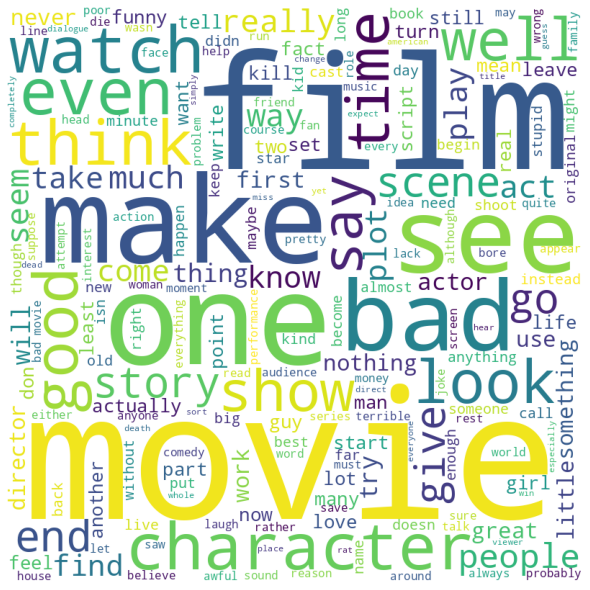

In [ ]:
#Building a words cloud
from wordcloud import WordCloud
word_cloud_df = data.loc[data["sentiment"] == 'negative',:]
all_words = ' '.join([text for text in word_cloud_df['review_processed']])

wordcloud = WordCloud(width = 800 , height = 800, background_color = 'white' , min_font_size = 10).generate(all_words)

#Plot wordcloud image
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**Bag of Words Model**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#create matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features = 2500)
X = tfidf.fit_transform(data.review_processed).toarray()
Y = data.sentiment.map({'positive' : 1 , 'negative' : 0}).values
featureNames = tfidf.get_feature_names_out()

Y


array([1, 1, 1, ..., 1, 1, 1])

**splitting**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size =0.20, random_state = 4)

In [ ]:
X_train.shape

(7893, 2500)

**Building ML model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_predict = dt.predict(X_test)
Y_predict


array([1, 1, 1, ..., 0, 1, 1])

**Fetaure Importance**


In [ ]:
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','Words'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,Words
44,0.148407,bad
460,0.041048,waste
203,0.032441,great
43,0.020151,awful
156,0.018930,excellent
...,...,...
462,0.000252,ways
113,0.000251,david
403,0.000250,status
67,0.000249,breast


In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score
accuracy = accuracy_score(Y_test, Y_predict)
accuracy

0.7061803444782169

In [ ]:
confuse_mat = confusion_matrix(Y_test, Y_predict)
confuse_mat

array([[690, 281],
       [299, 704]])

<Axes: >

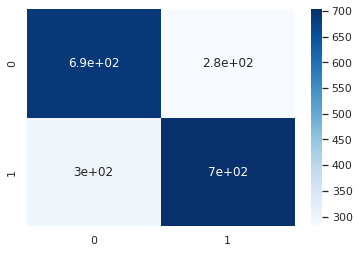

In [ ]:
#Mapping confusion Matrix
#group_names = ["True Pos","False Pos","False Neg","True Neg"]
sns.heatmap(confuse_mat , annot = True , cmap = 'Blues')

<Axes: >

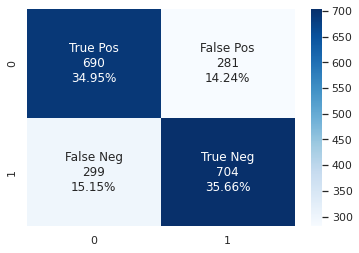

In [ ]:
import numpy as np
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in confuse_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confuse_mat.flatten()/np.sum(confuse_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confuse_mat, annot=labels, fmt="", cmap='Blues')

**Prediction**

In [ ]:
#eg = "The movie is very bad. One of the worst experience that I have had in theatres."
eg = "the move is very good. One of the best movie i have seen. Top class"
eg = eg.replace(".", " ")
eg = " ".join([x for x in eg.split() if len(x) > 2])
eg = eg.lower()
eg

'the move very good one the best movie have seen top class'

In [ ]:
#eg = remove_stopwords(eg)
eg = Lemmatize_sentence(eg)

eg

'the move very good one the best movie have see top class'

In [ ]:
X_test = tfidf.transform([eg]).toarray()
X_test

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
dt.predict(X_test)

array([1])

# **Ensemble Learning**

Supervised Learning, Both for rgression and classification

In [ ]:
import pandas as pd
data = pd.read_csv("train_ctrUa4K.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.shape

(614, 13)

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data.Gender.value_counts()
data["Gender"].fillna("Male" , inplace = True)
data["Dependents"].fillna('Yes', inplace = True)
data["Married"].fillna('Yes', inplace = True)
data["Self_Employed"].fillna('No', inplace = True)
mean = data["LoanAmount"].mean()
data["LoanAmount"].fillna(value = mean, inplace = True)
data["Loan_Amount_Term"].fillna(360, inplace = True)
data["Credit_History"].fillna(0,inplace = True)
data["Dependents"].dropna(inplace =True)
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
data["Credit_History"] = data["Credit_History"].astype(int)

In [ ]:
data = data.drop_duplicates()
data.shape

(614, 13)

In [ ]:
data["Loan_Status"].unique()


array(['Y', 'N'], dtype=object)

In [ ]:
data = data.drop(["Loan_ID"], axis = 1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1,Urban,Y


In [ ]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
data["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
data["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', 'Yes'], dtype=object)

In [ ]:
data["Gender"] = data["Gender"].map({'Male':0, 'Female':1})
data['Married'] = data['Married'].map({'Yes' : 1, 'No': 0})
data['Education'] = data['Education'].map({'Graduate' : 1 , 'Not Graduate':0})
data["Dependents"] = data["Dependents"].map({"0" : 0, "1" : 1,"2" : 2,"3+" : 4,'nan' : 0 , 'Yes' : 2})
data["Loan_Status"] = data['Loan_Status'].map({'Y':1,'N':0})
data["Self_Employed"] = data["Self_Employed"].map({"Yes" : 1, "No" : 0})
data = pd.get_dummies(data,columns = ["Property_Area"]) # One hot encoding
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1,1,0,0,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1,0,1,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1,1,0,0,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1,1,0,0,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1,1,0,0,1


In [ ]:
data["Dependents"].unique()

array([0, 1, 2, 4])

In [ ]:
data.dtypes

Gender                       int64
Married                      int64
Dependents                   int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History               int64
Loan_Status                  int64
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

**Splitting**

In [ ]:
X = data.drop(["Loan_Status"],axis = 1)
Y = data["Loan_Status"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 2)

In [ ]:
data.isnull().sum()

Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [ ]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
222,0,0,0.0,1,0,2971,2791.0,144.0,360.0,1,0,1,0
281,0,1,0.0,1,0,3927,800.0,112.0,360.0,1,0,1,0
372,0,1,2.0,1,1,9323,7873.0,380.0,300.0,1,1,0,0
32,0,0,1.0,1,1,4692,0.0,106.0,360.0,1,1,0,0
204,0,1,2.0,0,0,3917,0.0,124.0,360.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1,0,0.0,0,1,18165,0.0,125.0,360.0,1,0,0,1
584,0,1,1.0,1,0,2787,1917.0,146.0,360.0,0,1,0,0
493,1,0,0.0,0,1,17263,0.0,225.0,360.0,1,0,1,0
527,0,1,1.0,0,0,5285,1430.0,161.0,360.0,0,0,1,0


**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

model1 = LogisticRegression(random_state = 12)
model2 = DecisionTreeClassifier(random_state = 12)
model3 = KNeighborsClassifier(7)
model = VotingClassifier(estimators = [('lr',model1),('dt',model2),('knn',model3)], voting = 'soft') # combines all three ML algo and voting = hard means max voting 
# model is the combo of all LR, DT, KNN

model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)

#accuracy = accuracy_score(Y_test,Y_predict)
roc_auc_score(Y_test, model.predict_proba(X_test)[:,1])


0.7634310134310134

In [ ]:
model3 = KNeighborsClassifier(7)
model3.fit(X_train,Y_train)
model3.predict(X_test)
roc_auc_score(Y_test, model3.predict_proba(X_test)[:,1])

0.7147435897435898

Model built with KNN clasifier ML algo gives accuracy of 71 % where as combo of Logistic Regression, Decision Tree and KNN classifier gives accuracy 76%

**Advanced Ensemble Techniques**

**Bagging (Bootsrap Aggregation)**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

model = BaggingClassifier(DecisionTreeClassifier(max_depth = 1, random_state = 1),n_estimators = 100)
model.fit(X_train,Y_train)
model.predict(X_test)
model.score(X_test,Y_test)

0.7723577235772358

# **Random Forest** 

Based on Bagging ( Bagging builds parallel and independent models - **Boot strap aggregation**)

In [ ]:
import pandas as pd
data = pd.read_csv("temps.csv")
data.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [ ]:
data["week"].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [ ]:
data["week"] = data["week"].map({'Sun': 1 , 'Mon': 2, 'Tues': 3, 'Wed': 4, 'Thurs' : 5, 'Fri': 6, 'Sat' : 7})

In [ ]:
data["week"].unique()

array([6, 7, 1, 2, 3, 4, 5])

In [ ]:
data = data.drop(["friend"], axis = 1)
data.head()

,year,month,day,week,temp_2,temp_1,average,actual
0,2016,1,1,6,45,45,45.6,45
1,2016,1,2,7,44,45,45.7,44
2,2016,1,3,1,45,44,45.8,41
3,2016,1,4,2,44,41,45.9,40
4,2016,1,5,3,41,40,46.0,44


With the historical data, we are trying to predict the actual temperature

In [ ]:
data.isnull().sum()

year       0
month      0
day        0
week       0
temp_2     0
temp_1     0
average    0
actual     0
dtype: int64

In [ ]:
data = data.drop_duplicates()
data.shape

(348, 8)

In [ ]:
data.dtypes

year         int64
month        int64
day          int64
week         int64
temp_2       int64
temp_1       int64
average    float64
actual       int64
dtype: object

**Spliting**

In [ ]:
X = data.drop(["actual"],axis = 1)
Y = data["actual"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 7)

Since temperature is a continous variable, its a regression problem

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
Random_forest = RandomForestRegressor(n_estimators = 100 , max_depth = 3, max_features = 'sqrt')
Random_forest.fit(X_train,Y_train)
Y_predict = Random_forest.predict(X_test)
r2_score(Y_predict,Y_test)


0.766226697203489

Interpretting Model results

In [ ]:
data_list = list(X.columns)
data_list

['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average']

In [ ]:
from sklearn.tree import export_graphviz
import pydot

# pull out one tree from Randomforest
tree = Random_forest.estimators_[16]

#Export the image to the dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = data_list, rounded = True, precision = 1)

#USe dot file to create graph
(graph,) = pydot.graph_from_dot_file('tree.dot')

#Write the graph to png file
graph.write_png('tree.png');

In [ ]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 3


**Feature Importance**


In [ ]:
imp_feature = list(Random_forest.feature_importances_)

feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(data_list, imp_feature)]

feature_importance = sorted(feature_importance, key = lambda x: x [1] , reverse = True)

[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in feature_importance];

Feature: temp_1               Importance: 0.34
Feature: average              Importance: 0.34
Feature: temp_2               Importance: 0.18
Feature: month                Importance: 0.13
Feature: day                  Importance: 0.01
Feature: week                 Importance: 0.01
Feature: year                 Importance: 0.0


**Model with most two imp features**

In [ ]:
X

,year,month,day,week,temp_2,temp_1,average
0,2016,1,1,6,45,45,45.6
1,2016,1,2,7,44,45,45.7
2,2016,1,3,1,45,44,45.8
3,2016,1,4,2,44,41,45.9
4,2016,1,5,3,41,40,46.0
...,...,...,...,...,...,...,...
343,2016,12,27,3,42,42,45.2
344,2016,12,28,4,42,47,45.3
345,2016,12,29,5,47,48,45.3
346,2016,12,30,6,48,48,45.4


In [ ]:
X_train_imp = X_train[["temp_1", 'average']]
X_test_imp = X_test[["temp_1", 'average']]

In [ ]:
rf_imp_feat = Random_forest.fit(X_train_imp, Y_train)
Y_predict_imp = rf_imp_feat.predict(X_test_imp)

In [ ]:
errors = abs(Y_predict_imp - Y_test)
errors

176    2.245801
30     5.022532
205    4.661311
345    0.339135
316    0.513913
         ...   
267    1.351145
157    4.830027
138    6.054492
80     0.591260
302    5.966614
Name: actual, Length: 70, dtype: float64

In [ ]:
import numpy as np
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.2 degrees.


In [ ]:
r2_score(Y_test,Y_predict_imp)

0.8837524204923637

Only with two most important features, the models gives accuracy of 88%

# **XG Boost** - Gradient Boosting (Based on Boosting)

Boosting builds iterative and dependent models

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
  model.fit(X_train,Y_train)
  model.score(X_test,Y_test)
  print("Learning rate ",lr ,"Training : ", model.score(X_train,Y_train),"CV-Score : ",np.mean(cross_val_score(model, X_train, Y_train, cv = 10)))

Learning rate  0.01 Training :  -3.2163800817754993 CV-Score :  -3.6651409544555875
Learning rate  0.02 Training :  0.3161625306712401 CV-Score :  0.19346201269726393
Learning rate  0.03 Training :  0.8483808714458537 CV-Score :  0.705096569157724
Learning rate  0.04 Training :  0.9444936236545884 CV-Score :  0.7740460747560548
Learning rate  0.05 Training :  0.9667675425628846 CV-Score :  0.7804822744638578
Learning rate  0.06 Training :  0.9764343003920131 CV-Score :  0.7792456367666556
Learning rate  0.07 Training :  0.9818885991708552 CV-Score :  0.7775728901823931
Learning rate  0.08 Training :  0.9871063561758529 CV-Score :  0.770540101752634
Learning rate  0.09 Training :  0.9901959399739423 CV-Score :  0.7807779662946367
Learning rate  0.1 Training :  0.993193058312663 CV-Score :  0.7658789045682969
Learning rate  0.11 Training :  0.994130798258265 CV-Score :  0.7697171074860474
Learning rate  0.12 Training :  0.9955266919492609 CV-Score :  0.7616056771801287
Learning rate  0.1

In [ ]:
model = xgb.XGBRegressor(learning_rate = 0.05, n_estimators = 100)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.811269006150957

At learning rate 0.05, the model gives accuracy of 81 %

**Voting Regressor**

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

model1 = LinearRegression()
model2 = DecisionTreeRegressor(random_state = 1)
model3 = KNeighborsRegressor(3)
model = VotingRegressor(estimators = [('lr',model1),('dt',model2), ('knn',model3)]) 
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.833949727878236